In [1]:
import torch
import torchvision
from torchvision import datasets, models

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import shutil
shutil.unpack_archive("/content/drive/MyDrive/CV Data/public_training_set_release_2.0.tar", "/content/Dataset")

In [4]:
from pycocotools.coco import COCO
coco = COCO('/content/Dataset/annotations.json')
categories = coco.cats
n_classes = len(categories.keys())
categories


loading annotations into memory...
Done (t=4.67s)
creating index...
index created!


{1565: {'id': 1565,
  'name': 'bread-wholemeal',
  'name_readable': 'Bread, wholemeal',
  'supercategory': 'food'},
 2099: {'id': 2099,
  'name': 'jam',
  'name_readable': 'Jam',
  'supercategory': 'food'},
 2578: {'id': 2578,
  'name': 'water',
  'name_readable': 'Water',
  'supercategory': 'food'},
 1556: {'id': 1556,
  'name': 'bread-sourdough',
  'name_readable': 'Bread, sourdough',
  'supercategory': 'food'},
 1154: {'id': 1154,
  'name': 'banana',
  'name_readable': 'Banana',
  'supercategory': 'food'},
 1352: {'id': 1352,
  'name': 'soft-cheese',
  'name_readable': 'Soft cheese',
  'supercategory': 'food'},
 1893: {'id': 1893,
  'name': 'ham-raw',
  'name_readable': 'Ham, raw',
  'supercategory': 'food'},
 1310: {'id': 1310,
  'name': 'hard-cheese',
  'name_readable': 'Hard cheese',
  'supercategory': 'food'},
 1264: {'id': 1264,
  'name': 'cottage-cheese',
  'name_readable': 'Cottage cheese',
  'supercategory': 'food'},
 1536: {'id': 1536,
  'name': 'bread-half-white',
  'name_

In [11]:
for key in coco.imgs.keys():
    print(coco.imgs[key])
    break

{'id': 131094, 'file_name': '131094.jpg', 'width': 480, 'height': 480}


In [6]:
# get all coco categories
len(coco.getCatIds())# get ids of categories

498

In [7]:
# get metadata of coco categories
coco.loadCats(coco.getCatIds())[:5]# returns dictionary

[{'id': 1565,
  'name': 'bread-wholemeal',
  'name_readable': 'Bread, wholemeal',
  'supercategory': 'food'},
 {'id': 2099, 'name': 'jam', 'name_readable': 'Jam', 'supercategory': 'food'},
 {'id': 2578,
  'name': 'water',
  'name_readable': 'Water',
  'supercategory': 'food'},
 {'id': 1556,
  'name': 'bread-sourdough',
  'name_readable': 'Bread, sourdough',
  'supercategory': 'food'},
 {'id': 1154,
  'name': 'banana',
  'name_readable': 'Banana',
  'supercategory': 'food'}]

In [8]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
bread-wholemeal jam water bread-sourdough banana soft-cheese ham-raw hard-cheese cottage-cheese bread-half-white coffee-with-caffeine fruit-salad pancakes tea salmon-smoked avocado spring-onion-scallion ristretto-with-caffeine ham egg bacon-frying chips-french-fries juice-apple chicken tomato-raw broccoli shrimp-boiled beetroot-steamed-without-addition-of-salt carrot-raw chickpeas french-salad-dressing pasta-hornli sauce-cream meat-balls pasta tomato-sauce cheese pear cashew-nut almonds lentils mixed-vegetables peanut-butter apple blueberries cucumber cocoa-powder greek-yaourt-yahourt-yogourt-ou-yoghourt maple-syrup-concentrate buckwheat-grain-peeled butter herbal-tea mayonnaise soup-vegetable wine-red wine-white green-bean-steamed-without-addition-of-salt sausage pizza-margherita-baked salami mushroom bread-meat-substitute-lettuce-sauce tart tea-verveine rice white-coffee-with-caffeine linseeds sunflower-seeds ham-cooked bell-pepper-red-raw zucchini green-asparagus t

In [9]:
import numpy as np
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['bread-wholemeal','jam','banana']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds

[75126, 20206]

In [10]:
imgIds = coco.getImgIds(imgIds = [75126])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [11]:
imgIds

[75126]

In [20]:
catIds

[1565, 2099, 1154]

In [15]:
coco.cats[1154]

{'id': 1154,
 'name': 'banana',
 'name_readable': 'Banana',
 'supercategory': 'food'}

In [16]:
print(img)

{'id': 75126, 'file_name': '075126.jpg', 'width': 464, 'height': 464}


In [17]:
images_path = '/content/Dataset/images'

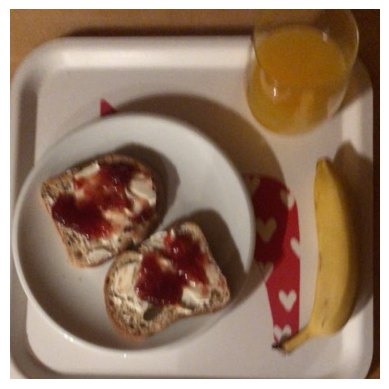

In [18]:
import skimage.io as io
import matplotlib.pyplot as plt
import os
%matplotlib inline
I = io.imread(os.path.join(images_path,'075126.jpg'))
plt.axis('off')
plt.imshow(I)
plt.show()

[114738, 114739, 114741]
[{'id': 114738, 'image_id': 75126, 'category_id': 1154, 'segmentation': [[383.38, 192.56, 384.54, 261.0, 378.74, 342.20000000000005, 377.58, 380.47999999999996, 361.34000000000003, 394.4, 335.82, 424.56, 361.34000000000003, 428.04, 397.29999999999995, 411.79999999999995, 425.14, 387.44, 432.1, 353.79999999999995, 428.62, 285.36, 419.34000000000003, 236.64000000000001, 407.74, 191.39999999999998]], 'area': 10346.0, 'bbox': [192.56, 335.82, 232.0, 96.28000000000003], 'iscrowd': 0}, {'id': 114739, 'image_id': 75126, 'category_id': 1565, 'segmentation': [[180.38, 281.88, 189.66, 230.84, 178.06, 194.88, 116.57999999999998, 175.16, 50.46, 205.32, 35.38, 243.60000000000002, 79.46000000000001, 327.12, 127.02, 308.56, 122.38, 348.0, 128.18, 394.4, 166.46, 408.32, 237.22, 388.6, 280.14, 366.56, 288.26, 354.96, 261.58, 302.76, 238.38000000000002, 270.28000000000003, 205.89999999999998, 272.6]], 'area': 32285.0, 'bbox': [35.38, 35.38, 291.74, 252.88], 'iscrowd': 0}, {'id':

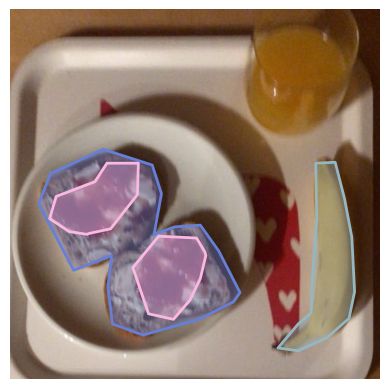

In [19]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns,draw_bbox=False)

{'id': 75126, 'file_name': '075126.jpg', 'width': 464, 'height': 464}


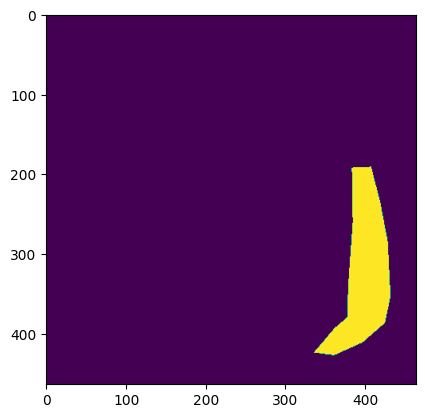

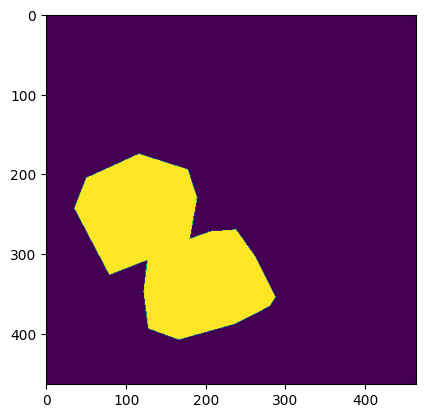

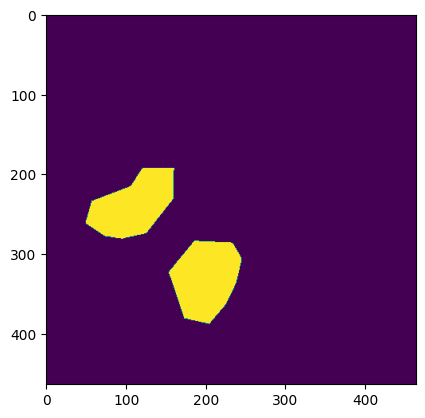

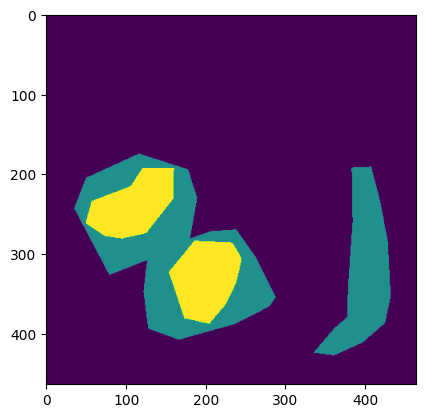

In [22]:
# get binary mask from annotation ids
ann = coco.loadAnns([114738, 114739, 114741])
# print(ann)
# print(ann['image_id'])
print(coco.imgs[ann[0]['image_id']])
m = np.zeros((464,464))
for a in ann:
    mask = coco.annToMask(a)
    plt.imshow(mask)
    plt.show()
    m+=mask
plt.imshow(m)

In [28]:
!pip install scikit-multilearn
!pip install funcy
!pip install argparse

In [32]:
! python cocosplit.py --having-annotations --multi-class -s 0.8 '/content/Dataset/annotations.json' train.json test.json

Saved 61193 entries in train.json and 15298 in test.json


In [29]:
# !git clone https://github.com/akarazniewicz/cocosplit.git